# **RBM**

In [26]:
import numpy as np
import matplotlib.pyplot as plt

class RBM:
    def __init__(self, num_visible, num_hidden):
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.W = np.random.randn(num_visible, num_hidden)
        self.b = np.zeros(num_hidden)
        self.a = np.zeros(num_visible)

    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))

    def gibbs_sampling(self, v, k):
        for _ in range(k):
            h = self.sigmoid(np.dot(v, self.W) + self.b)
            h_sample = np.random.binomial(1, h)
            v = self.sigmoid(np.dot(h_sample, self.W.T) + self.a)
            v_sample = np.random.binomial(1, v)
        return v, h

    def compute_reconstruction_error(self, data):
        reconstructed_data = self.sigmoid(np.dot(self.sigmoid(np.dot(data, self.W) + self.b), self.W.T) + self.a)
        error = np.mean(np.square(data - reconstructed_data))
        return error


    def train(self, data, learning_rate, k, epochs, batch_size):
        num_batches = len(data) // batch_size
        costs = []

        for epoch in range(epochs):
            np.random.shuffle(data)
            for batch_idx in range(num_batches):
                batch_data = data[batch_idx * batch_size : (batch_idx + 1) * batch_size]

                pos_associations_batch = np.zeros_like(self.W)
                neg_associations_batch = np.zeros_like(self.W)
                a_diff_batch = np.zeros_like(self.a)
                b_diff_batch = np.zeros_like(self.b)

                for v in batch_data:
                    v_sample = np.copy(v)
                    v_k, h_k = self.gibbs_sampling(v_sample, k)

                    pos_associations_batch += np.outer(v, self.sigmoid(np.dot(v, self.W) + self.b))
                    neg_associations_batch += np.outer(v_k, self.sigmoid(np.dot(v_k, self.W) + self.b))
                    a_diff_batch += (v - v_k)
                    b_diff_batch += (self.sigmoid(np.dot(v, self.W) + self.b) - self.sigmoid(np.dot(v_k, self.W) + self.b))

                self.W += learning_rate * (pos_associations_batch - neg_associations_batch) / batch_size
                self.a += learning_rate * a_diff_batch / batch_size
                self.b += learning_rate * b_diff_batch / batch_size

            cost = self.compute_reconstruction_error(data)
            costs.append(cost)
            print(f"Epoch {epoch + 1}, Reconstruction Error: {cost}, Weight: {self.W[0][0]}, Visible Bias: {self.a[0]}, Hidden Bias: {self.b[0]}")

        return costs


seed = 10
np.random.seed(seed)
data = np.random.binomial(1, 0.5, size=(100, 20))

num_visible = data.shape[1]
num_hidden = 50
learning_rate = 0.008
k = 1
epochs = 500
batch_size = 5


rbm = RBM(num_visible, num_hidden)
costs = rbm.train(data, learning_rate, k, epochs, batch_size)





Epoch 1, Reconstruction Error: 0.14831116761259006, Weight: 1.3938758689776158, Visible Bias: -0.038933502792544115, Hidden Bias: -0.004741490098638335
Epoch 2, Reconstruction Error: 0.11790732636590698, Weight: 1.3805402443311763, Visible Bias: -0.06955014370738638, Hidden Bias: -0.006791816217936975
Epoch 3, Reconstruction Error: 0.09814650656560805, Weight: 1.3743624543254058, Visible Bias: -0.09049900913884153, Hidden Bias: -0.004009707006215566
Epoch 4, Reconstruction Error: 0.08361432555383681, Weight: 1.3714729493924571, Visible Bias: -0.10170525794010175, Hidden Bias: -0.0005682348247718822
Epoch 5, Reconstruction Error: 0.07378232906070661, Weight: 1.3643804769727201, Visible Bias: -0.1195700733828969, Hidden Bias: -0.0004902556423074542
Epoch 6, Reconstruction Error: 0.0660972973452914, Weight: 1.3539449648789998, Visible Bias: -0.14026272922198477, Hidden Bias: -0.0044498095862920885
Epoch 7, Reconstruction Error: 0.06100645864520641, Weight: 1.3527806924378105, Visible Bias

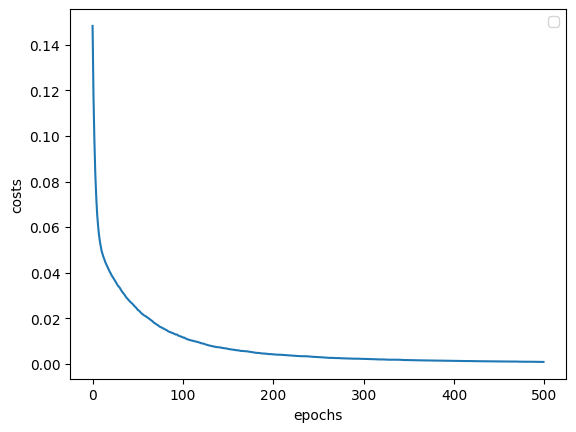

In [27]:
costs = np.array(costs)
plt.plot(costs)
plt.xlabel("epochs")
plt.ylabel("costs")
plt.legend()
plt.show()

In [28]:
 weight = 1.754354539082827
 visible_bias =  -0.007365109817485254
 new_data = weight*data + visible_bias



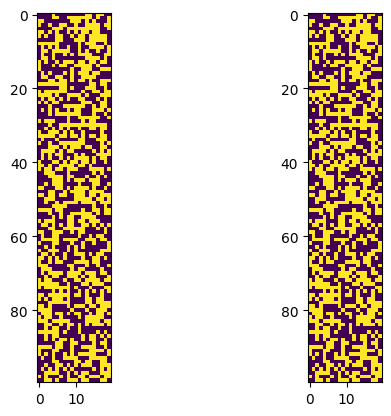

In [29]:
plt.subplot(1,2,1)
plt.imshow(data)
plt.subplot(1,2,2)
plt.imshow(new_data)

